# Simulação do Modelo Atual Usando o Requisito Não Funcional (RNF) de Confidencialidade

Nesta análise, estamos realizando uma simulação do sistema atual com foco no Requisito Não Funcional (RNF) de confidencialidade. O objetivo é avaliar como o sistema responde a eventos que podem comprometer a confidencialidade dos acessos e identificar potenciais riscos associados a incidentes. Para isso, utilizamos um modelo de máquina de estados, que representa as diferentes fases de interação do sistema com os acessos e possíveis incidentes.

## Estrutura do Modelo de Estados

O modelo consiste em três estados principais, cada um representando uma etapa distinta no fluxo de acessos e monitoramento de incidentes de confidencialidade:

Solicitação de Acesso (S1): Este é o estado inicial, onde uma pessoa solicita acesso ao sistema. Representa o momento em que o sistema recebe pedidos de acesso e processa essas requisições, garantindo, a princípio, que as condições de confidencialidade estejam respeitadas.

Acesso Manual (S2): Neste estado, o acesso é concedido manualmente, o que significa que uma intervenção humana pode ser necessária para autorizar o uso do sistema. Esse estado é um ponto crítico, pois o acesso manual aumenta o risco de falhas de confidencialidade, seja por erro humano ou por descumprimento de protocolos de segurança.

Incidente (S3): Este estado representa uma falha de confidencialidade, onde ocorre um incidente de segurança. Uma vez que um acesso é comprometido, ele entra neste estado, o que indica que o sistema sofreu uma violação que pode afetar a confidencialidade dos dados. Em nosso modelo, destacamos a possibilidade de permanência neste estado para representar a criticidade dos incidentes e a dificuldade de retornar à operação normal sem riscos contínuos.

## Probabilidades de Transição

Cada estado possui probabilidades de transição que refletem a realidade do sistema atual. Por exemplo:

De "Solicitação de Acesso" (S1), a probabilidade de avançar para "Acesso Manual" (S2) é alta, sugerindo que a maioria das requisições exige um nível adicional de intervenção.

Do estado "Acesso Manual" (S2), há uma probabilidade considerável de que ocorra um incidente (S3), o que revela um risco associado a acessos manuais sem garantia de confidencialidade.

Do estado "Incidente" (S3), a probabilidade de permanência é significativa, evidenciando a criticidade desses eventos e a dificuldade em manter a confidencialidade após uma violação.

## Criando DataFrame

In [ ]:
# Importando a biblioteca pandas
import pandas as pd

# Criando o dicionário com os dados
dados = {
    "Mes": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    "DemandaAcessos.mês": [3232.9, 1927.4, 4667.8, 817.3, 2235.5, 4367.0, 669.3, 1934.6, 438.1, 2481.4, 1488.3, 1456.6],
    "Riscos_nIncidentesConfidencialidade.mês": [1131.5, 674.6, 1633.7, 286.1, 782.4, 1528.5, 234.3, 677.1, 153.3, 868.5, 520.9, 509.8]
}

# Criando o DataFrame
df = pd.DataFrame(dados)

# Exibindo o DataFrame
df


,Mes,DemandaAcessos.mês,Riscos_nIncidentesConfidencialidade.mês
0,1,3232.9,1131.5
1,2,1927.4,674.6
2,3,4667.8,1633.7
3,4,817.3,286.1
4,5,2235.5,782.4
5,6,4367.0,1528.5
6,7,669.3,234.3
7,8,1934.6,677.1
8,9,438.1,153.3
9,10,2481.4,868.5


## Probabilidade de risco de incidentes de confidencialidade

In [ ]:
# Dados da demanda de acessos e riscos de incidentes de confidencialidade por mês
demanda_acessos = [3232.9, 1927.4, 4667.8, 817.3, 2235.5, 4367.0, 669.3, 1934.6, 438.1, 2481.4, 1488.3, 1456.6]
riscos_incidentes = [1131.5, 674.6, 1633.7, 286.1, 782.4, 1528.5, 234.3, 677.1, 153.3, 868.5, 520.9, 509.8]

# Calculando a porcentagem de risco de incidentes em relação à demanda de acessos para cada mês
percentual_risco_incidentes = [(riscos / demanda) * 100 for riscos, demanda in zip(riscos_incidentes, demanda_acessos)]

# Calculando a média das porcentagens
media_percentual_risco_incidentes = sum(percentual_risco_incidentes) / len(percentual_risco_incidentes)

# Exibindo os resultados
print("Porcentagens de risco de incidentes por mês:", percentual_risco_incidentes)
print("Média da porcentagem de risco de incidentes:", media_percentual_risco_incidentes)


Porcentagens de risco de incidentes por mês: [34.99953602029138, 35.00051883366193, 34.99935729894169, 35.005505934173506, 34.998881681950344, 35.00114495076711, 35.00672344240252, 34.99948309728109, 34.992010956402645, 35.00040299830741, 34.99966404622724, 34.99931346972402]
Média da porcentagem de risco de incidentes: 35.000211894177575


## Máquina de Estados para Modelagem de Incidentes

Agora que estabelecemos que a taxa média de risco de incidentes de confidencialidade é de 35%, podemos usar essa informação como um parâmetro para a modelagem da nossa máquina de estados. Essa taxa nos fornece uma base sólida para entender a dinâmica dos estados em nosso sistema, permitindo que ajustemos as probabilidades de transição de forma mais realista.

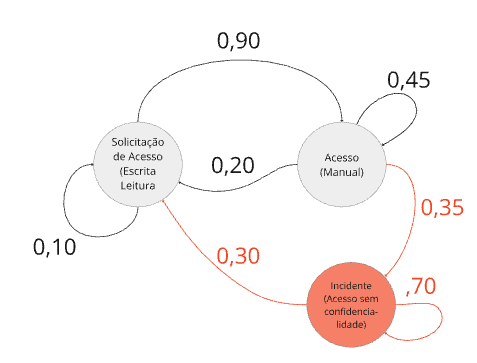

A matriz de transição atual para os estados da nossa máquina é a seguinte:

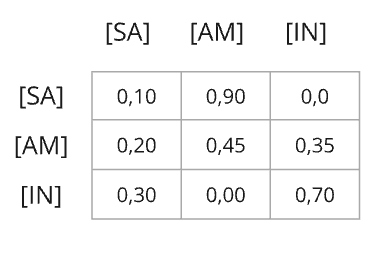

**Estado 1 (Solicitação de Acesso):**

0.10: Probabilidade de permanecer no mesmo estado.

0.90: Probabilidade de transitar para o estado de Acesso Manual.

0.00: Probabilidade de transitar para o estado de Incidente.

**Estado 2 (Acesso Manual):**

0.20: Probabilidade de voltar para o estado de Solicitação de Acesso.

0.45: Probabilidade de permanecer no mesmo estado.

0.35: Probabilidade de transitar para o estado de Incidente.

**Estado 3 (Incidente):**

0.30: Probabilidade de voltar para o estado de Solicitação de Acesso.

0.00: Probabilidade de permanecer no mesmo estado.

0.70: Probabilidade de permanecer no estado de Incidente.

In [ ]:
import numpy as np
import random as rm
import datetime

# O espaço de estados
states = ["SolicitacaoAcesso", "AcessoManual", "IncidenteAcessoSemConfidencialidade"]

# Possíveis sequências de eventos
transitionName = [["SASA", "SAAM", "SAIN"],
                  ["AMSA", "AMAM", "AMIN"],
                  ["INSA", "INAM", "ININ"]]

# Matriz de probabilidades (matriz de transição)
transitionMatrix = [[0.10, 0.90, 0.00],    # Transições a partir do estado 1 (Solicitação de Acesso)
                    [0.20, 0.45, 0.35],    # Transições a partir do estado 2 (Acesso Manual)
                    [0.30, 0.00, 0.70]]    # Transições a partir do estado 3 (Incidente)

# Verificando se a soma das linhas da matriz de transição está correta
if (sum(transitionMatrix[0]) != 1.0 or
    sum(transitionMatrix[1]) != 1.0 or
    sum(transitionMatrix[2]) != 1.0):
    print("Detectado um erro - talvez na matriz de probabilidades?")
else:
    print("Tudo certo. Vamos em frente. ", (datetime.datetime.now() + datetime.timedelta(hours=-3)), "!!")


Tudo certo. Vamos em frente.  2024-11-05 01:12:04.436259 !!


1. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "SolicitacaoAcesso" é de ......................: 16.83 %
2. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "AcessoManual" é de ...........................: 52.80 %
3. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "IncidenteAcessoSemConfidencialidade" é de ....: 30.37 %



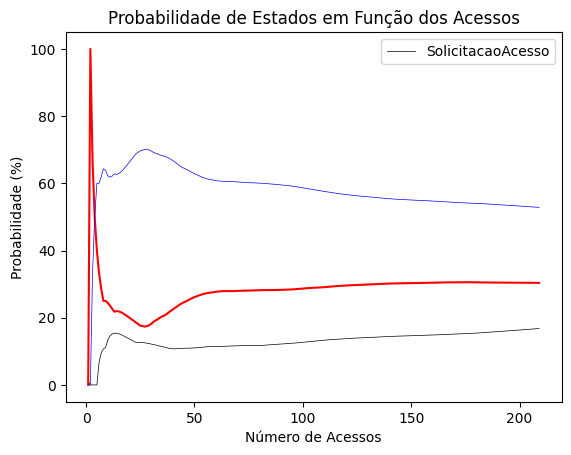

In [ ]:
import numpy as np
import random as rm
import datetime
import matplotlib.pyplot as plt

def activity_forecast(actions, transitionMatrix, transitionName):
    # Choose the starting state
    activityAction = "SolicitacaoAcesso"
    activityList = [activityAction]
    prob = 1

    for _ in range(actions):
        if activityAction == "SolicitacaoAcesso":
            change = np.random.choice(transitionName[0], replace=True, p=transitionMatrix[0])
            if change == "SASA":
                prob *= 0.10
                activityAction = "SolicitacaoAcesso"
            elif change == "SAAM":
                prob *= 0.90
                activityAction = "AcessoManual"
            else:
                prob *= 0.0
                activityAction = "IncidenteAcessoSemConfidencialidade"
            activityList.append(activityAction)

        elif activityAction == "AcessoManual":
            change = np.random.choice(transitionName[1], replace=True, p=transitionMatrix[1])
            if change == "AMSA":
                prob *= 0.20  # Transição para Solicitação Acesso
                activityAction = "SolicitacaoAcesso"
            elif change == "AMAM":
                prob *= 0.45  # Transição para Acesso Manual
                activityAction = "AcessoManual"
            elif change == "AMIN":
                prob *= 0.35  # Transição para Incidente Acesso Sem Confidencialidade
                activityAction = "IncidenteAcessoSemConfidencialidade"
            activityList.append(activityAction)

        elif activityAction == "IncidenteAcessoSemConfidencialidade":
            change = np.random.choice(transitionName[2], replace=True, p=transitionMatrix[2])
            if change == "INSA":
                prob *= 0.30  # Transição para Solicitação Acesso
                activityAction = "SolicitacaoAcesso"
            elif change == "INAM":
                prob *= 0.00  # Transição para Acesso Manual
                activityAction = "AcessoManual"
            elif change == "ININ":
                prob *= 0.70  # Transição para Incidente Acesso Sem Confidencialidade
                activityAction = "IncidenteAcessoSemConfidencialidade"
            activityList.append(activityAction)

    return activityList

# Transições de estados
transitionMatrix = [
    [0.10, 0.90, 0.00],  # Transições a partir do estado 1 (Solicitação de Acesso)
    [0.20, 0.45, 0.35],  # Transições a partir do estado 2 (Acesso Manual)
    [0.30, 0.00, 0.70]   # Transições a partir do estado 3 (Incidente Acesso Sem Confidencialidade)
]

transitionName = [
    ["SASA", "SAAM", "SAIN"],  # Nomes das transições para Solicitação de Acesso
    ["AMSA", "AMAM", "AMIN"],  # Nomes das transições para Acesso Manual
    ["INSA", "INAM", "ININ"]    # Nomes das transições para Incidente
]

# To save every activityList
list_activity = []
countSA = 0
countAM = 0
countIN = 0

# Vetores de probabilidades e eixo X
eixoX = []
probSolicitacaoAcesso = [1.0]
probAcessoManual = [0.0]
probIncidentesAcessoSemConfidencialidade = [0.0]

# Número de dias (Dias estimado/previsao - forecast) e de Acessos (Nactions)
Nactions = 210  # Cada dia dos 180 dias (210 acessos (35 pessoas, 6 acessos))
Ndias = 365  # Estimativa em dias (forecast)

# para cálculo de probabilidade em cada predição (acumulado)
totalSimuladoPredicao = 0

iteracao = 1
for index in range(1, Nactions):
    eixoX.append(index)

    # Estimar Ndias
    list_activity.append(activity_forecast(Ndias, transitionMatrix, transitionName))

    # Contadores para as atividades
    for smaller_list in list_activity:
        if smaller_list[2] == "SolicitacaoAcesso":
            countSA += 1
        if smaller_list[2] == "AcessoManual":
            countAM += 1
        if smaller_list[2] == "IncidenteAcessoSemConfidencialidade":
            countIN += 1

    totalSimuladoPredicao = countSA + countAM + countIN

    # Calculate the probabilities
    if totalSimuladoPredicao > 0:  # Evita divisão por zero
        probSolicitacaoAcesso.append((countSA / totalSimuladoPredicao) * 100.0)
        probAcessoManual.append((countAM / totalSimuladoPredicao) * 100.0)
        probIncidentesAcessoSemConfidencialidade.append((countIN / totalSimuladoPredicao) * 100.0)

    iteracao += 1

print(f'1. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "SolicitacaoAcesso" é de ......................: {probSolicitacaoAcesso[Nactions-1]:.2f} %')
print(f'2. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "AcessoManual" é de ...........................: {probAcessoManual[Nactions-1]:.2f} %')
print(f'3. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "IncidenteAcessoSemConfidencialidade" é de ....: {probIncidentesAcessoSemConfidencialidade[Nactions-1]:.2f} %')
print()

plt.plot(eixoX[:Nactions-1], probSolicitacaoAcesso[:Nactions-1], color='black', linewidth=0.5, label='SolicitacaoAcesso')
plt.plot(eixoX[:Nactions-1], probIncidentesAcessoSemConfidencialidade[:Nactions-1], color='red')
plt.plot(eixoX[:Nactions-1], probAcessoManual[:Nactions-1], color='blue', linewidth=0.5)
plt.xlabel("Número de Acessos")
plt.ylabel("Probabilidade (%)")
plt.legend()
plt.title("Probabilidade de Estados em Função dos Acessos")
plt.show()


# Simulação do Modelo Novo Usando o Requisito Não Funcional (RNF) de Confidencialidade

Nesta seção, apresentamos a simulação de um novo modelo que implementa requisitos não funcionais (RNF) focados na confidencialidade e segurança de acessos. Utilizamos uma máquina de estados para modelar e avaliar o comportamento do sistema em cenários de acesso, onde cada estado representa uma etapa crítica para garantir a segurança da informação e a rápida resposta a possíveis incidentes.

## Estrutura do Modelo de Estado

Para representar o fluxo e a proteção dos dados, o modelo foi dividido em cinco estados principais. Esses estados correspondem a pontos específicos do processo de acesso, com controles e verificações que reforçam a confidencialidade dos dados e permitem uma resposta imediata a incidentes de segurança. Abaixo, estão descritos os novos estados implementados no modelo:

**Solicitação de Acesso:** Neste primeiro estado, um usuário faz a solicitação para obter acesso a um recurso. Esse ponto é crítico para identificar o volume e a frequência de acessos, e para realizar verificações iniciais de segurança.

**Controle de Acesso com E2EE (Criptografia de Ponta a Ponta):** Após a solicitação, o acesso passa por um controle onde é aplicada criptografia de ponta a ponta (E2EE). Esse estado assegura que as informações estão protegidas durante a transmissão, reduzindo o risco de exposição de dados confidenciais.

**Acesso com Confidencialidade:** Nesse estado, o acesso é concedido com medidas adicionais de proteção para garantir a confidencialidade dos dados. Esse estágio é fundamental para atender ao requisito de confidencialidade e prevenir vazamentos ou acessos não autorizados a dados sensíveis.

**Detecção do Incidente por SIEM (Sistema de Gerenciamento de Eventos e Informações de Segurança):**
Este estado representa uma camada de segurança proativa, onde um sistema SIEM monitora continuamente as atividades de acesso e identifica qualquer comportamento suspeito que possa indicar uma violação de confidencialidade.

**Bloqueio Imediato de Acesso após Alerta:** Em caso de detecção de um possível incidente, o acesso é imediatamente bloqueado. Esse último estado garante que, ao identificar qualquer indício de violação, o sistema responda prontamente, interrompendo o acesso e preservando a integridade dos dados.

## Objetivo da Simulação

A simulação visa testar o comportamento do sistema ao longo desses estados, verificando como ele lida com demandas de acesso e como responde a potenciais incidentes, de modo a atender aos requisitos não funcionais de confidencialidade. O foco está em:

*   Analisar a probabilidade de transição entre os estados;
*   Avaliar o tempo de resposta e a eficácia do bloqueio ao detectar incidentes;
*   Testar o impacto das medidas de confidencialidade no fluxo de acessos.

## Criando DataFrame

In [ ]:
import pandas as pd

# Criando o dataset
data = {
    "Mes": list(range(1, 13)),
    "DemandaAcessos.mês": [5238.0, 1126.8, 4706.0, 5829.5, 2594.0, 5530.5, 3253.6, 12.5, 5035.1, 792.2, 528.7, 438.4],
    "Riscos de nIncidentesConfidencialidade.mês (Acesso Manual)": [1833.3, 394.4, 1647.1, 2040.3, 907.9, 1935.7, 1138.8, 4.4, 1762.3, 277.3, 185.0, 153.4],
    "IncidentesConfidencialidade.mês com melhoria": [52.4, 11.3, 47.1, 58.3, 25.9, 55.3, 32.5, 0.1, 50.4, 7.9, 5.3, 4.4]
}

# Convertendo para DataFrame
df_novo = pd.DataFrame(data)
df_novo


,Mes,DemandaAcessos.mês,Riscos de nIncidentesConfidencialidade.mês (Acesso Manual),IncidentesConfidencialidade.mês com melhoria
0,1,5238.0,1833.3,52.4
1,2,1126.8,394.4,11.3
2,3,4706.0,1647.1,47.1
3,4,5829.5,2040.3,58.3
4,5,2594.0,907.9,25.9
5,6,5530.5,1935.7,55.3
6,7,3253.6,1138.8,32.5
7,8,12.5,4.4,0.1
8,9,5035.1,1762.3,50.4
9,10,792.2,277.3,7.9


## Probabilidade de risco de incidentes de confidencialidade no novo modelo

In [ ]:
# Dados da demanda de acessos e riscos de incidentes de confidencialidade por mês
demanda_acessos = [2022.7, 4200.4, 159.2, 1392.0, 973.6, 5056.6, 5290.5, 5255.3, 4264.4, 1011.5, 3341.8, 9.1]
riscos_incidentes = [20.2, 42.0, 1.6, 13.9, 9.7, 50.6, 52.9, 52.6, 42.6, 10.1, 33.4, 0.1]

# Calculando a porcentagem de risco de incidentes em relação à demanda de acessos para cada mês
percentual_risco_incidentes = [(riscos / demanda) * 100 for riscos, demanda in zip(riscos_incidentes, demanda_acessos)]

# Calculando a média das porcentagens
media_percentual_risco_incidentes = sum(percentual_risco_incidentes) / len(percentual_risco_incidentes)

# Exibindo os resultados
print("Porcentagens de risco de incidentes por mês:", percentual_risco_incidentes)
print("Média da porcentagem de risco de incidentes:", media_percentual_risco_incidentes)

Porcentagens de risco de incidentes por mês: [0.9986651505413555, 0.9999047709741931, 1.0050251256281408, 0.9985632183908046, 0.9963023829087919, 1.0006723885614839, 0.999905490974388, 1.000894335242517, 0.9989682018572368, 0.9985170538803757, 0.9994613681249626, 1.098901098901099]
Média da porcentagem de risco de incidentes: 1.0079817154987791


## Máquina de Estados para Modelagem de Incidentes Modelo Novo

Agora que estabelecemos uma taxa de incidentes de 1% no novo modelo, podemos usar esse parâmetro como base para configurar as probabilidades de transição na máquina de estado. Com isso, ajustamos nosso modelo para refletir a maior proteção oferecida pela integração de requisitos de segurança e confidencialidade, especialmente com o uso de E2EE (criptografia de ponta a ponta) e a detecção de incidentes via SIEM (Sistema de Monitoramento de Segurança da Informação).

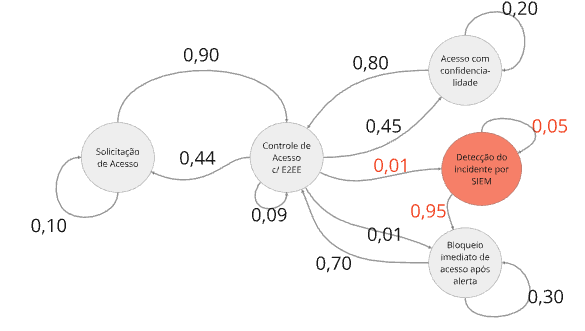

A configuração dos estados e suas respectivas transições agora considera a redução de incidentes de confidencialidade e o tratamento rápido dos incidentes identificados, com base na seguinte matriz de probabilidade de transição:

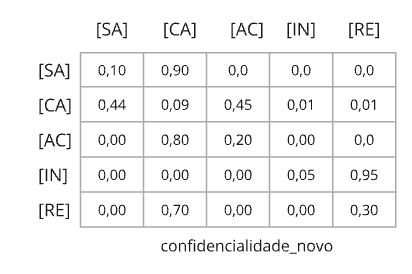

**Solicitação de Acesso:**

Há uma probabilidade de 10% de permanecer em "Solicitação de Acesso" e 90% de seguir para "Controle de Acesso c/ E2EE", refletindo a prioridade no reforço da segurança.

**Controle de Acesso c/ E2EE:**

Com 44% de chance de retorno à "Solicitação de Acesso", isso representa tentativas adicionais de verificação de identidade.
A probabilidade de 45% de passar para "Acesso com Confidencialidade" evidencia um acesso bem-sucedido com confidencialidade.
Uma pequena probabilidade de 1% de detectar incidentes já é aplicada neste estágio, demonstrando a eficácia de um controle de segurança com vigilância contínua.

**Acesso com Confidencialidade:**

Esse estado permite uma transição de 80% para "Controle de Acesso c/ E2EE", indicando uma revalidação para proteger os dados.
Há uma chance de 20% de permanecer no estado de "Acesso com Confidencialidade".

**Detecção do Incidente por SIEM:**

Uma vez no estado de "Detecção do Incidente", há uma alta probabilidade (95%) de transitar diretamente para "Bloqueio Imediato", garantindo uma resposta rápida ao alerta de incidente.

**Bloqueio Imediato:**

Um bloqueio de acesso tende a se manter (30%), mas ainda existe uma possibilidade de transitar de volta ao "Controle de Acesso c/ E2EE" (70%) para monitorar tentativas de reativação do acesso.

In [ ]:
import numpy as np
import random as rm
import datetime

# Espaço de estados atualizados
states = ["SolicitacaoAcesso", "ControleAcessoE2EE", "AcessoConfidencialidade", "DeteccaoIncidenteSIEM", "BloqueioImediato"]

# Sequências de eventos possíveis
transitionName = [
    ["SASA", "SACA", "SAAC", "SADI", "SABI"],      # Transições a partir do estado "SolicitacaoAcesso"
    ["CASA", "CACA", "CAAC", "CADI", "CABI"],      # Transições a partir do estado "ControleAcessoE2EE"
    ["ACSA", "ACCA", "ACAC", "ACDI", "ACBI"],      # Transições a partir do estado "AcessoConfidencialidade"
    ["DISA", "DICA", "DIAC", "DIDI", "DIBI"],      # Transições a partir do estado "DeteccaoIncidenteSIEM"
    ["BISA", "BICA", "BIAC", "BIDI", "BIBI"]       # Transições a partir do estado "BloqueioImediato"
]

# Matriz de transição de probabilidades atualizada
transitionMatrix = [
    [0.10, 0.90, 0.00, 0.00, 0.00],  # Transições a partir do estado "SolicitacaoAcesso"
    [0.44, 0.09, 0.45, 0.01, 0.01],  # Transições a partir do estado "ControleAcessoE2EE"
    [0.00, 0.80, 0.20, 0.00, 0.00],  # Transições a partir do estado "AcessoConfidencialidade"
    [0.00, 0.00, 0.00, 0.05, 0.95],  # Transições a partir do estado "DeteccaoIncidenteSIEM"
    [0.00, 0.70, 0.00, 0.00, 0.30]   # Transições a partir do estado "BloqueioImediato"
]

# Verificação da matriz de transição
if all(np.isclose(sum(row), 1.0) for row in transitionMatrix):
    print("Tudo certo. Vamos em frente.", datetime.datetime.now() + datetime.timedelta(hours=-3), "!!")
else:
    print("Detectado um erro - talvez na matriz de probabilidades?")


Tudo certo. Vamos em frente. 2024-11-05 17:42:51.030056 !!


1. Probabilidade de 'SolicitacaoAcesso' terminar em 'SolicitacaoAcesso': 23.17 %
2. Probabilidade de 'SolicitacaoAcesso' terminar em 'ControleAcessoE2EE': 52.68 %
3. Probabilidade de 'SolicitacaoAcesso' terminar em 'AcessoConfidencialidade': 21.96 %
4. Probabilidade de 'SolicitacaoAcesso' terminar em 'DeteccaoIncidenteSIEM': 0.42 %
5. Probabilidade de 'SolicitacaoAcesso' terminar em 'BloqueioImediato': 1.78 %


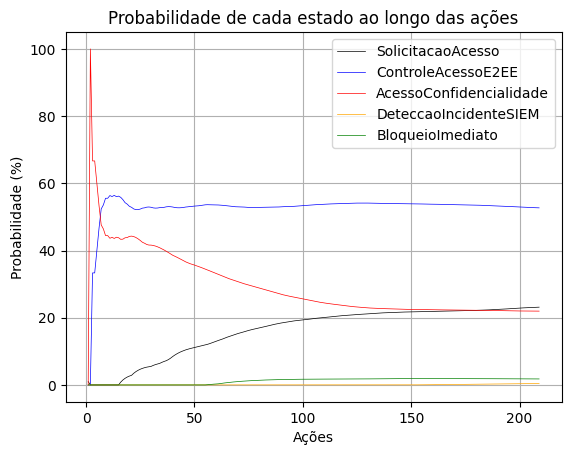

In [ ]:
import numpy as np
import random as rm
import matplotlib.pyplot as plt

def activity_forecast(actions, transitionMatrix, transitionName):
    # Estado inicial
    activityAction = "SolicitacaoAcesso"
    activityList = [activityAction]
    prob = 1

    for _ in range(actions):
        if activityAction == "SolicitacaoAcesso":
            change = np.random.choice(transitionName[0], replace=True, p=transitionMatrix[0])
            if change == "SASA":
                prob *= 0.10
                activityAction = "SolicitacaoAcesso"
            elif change == "SACA":
                prob *= 0.90
                activityAction = "ControleAcessoE2EE"
            activityList.append(activityAction)

        elif activityAction == "ControleAcessoE2EE":
            change = np.random.choice(transitionName[1], replace=True, p=transitionMatrix[1])
            if change == "CASA":
                prob *= 0.44
                activityAction = "SolicitacaoAcesso"
            elif change == "CACA":
                prob *= 0.09
                activityAction = "ControleAcessoE2EE"
            elif change == "CAAC":
                prob *= 0.45
                activityAction = "AcessoConfidencialidade"
            elif change == "CADI":
                prob *= 0.01
                activityAction = "DeteccaoIncidenteSIEM"
            elif change == "CABI":
                prob *= 0.01
                activityAction = "BloqueioImediato"
            activityList.append(activityAction)

        elif activityAction == "AcessoConfidencialidade":
            change = np.random.choice(transitionName[2], replace=True, p=transitionMatrix[2])
            if change == "ACCA":
                prob *= 0.80
                activityAction = "ControleAcessoE2EE"
            elif change == "ACAC":
                prob *= 0.20
                activityAction = "AcessoConfidencialidade"
            activityList.append(activityAction)

        elif activityAction == "DeteccaoIncidenteSIEM":
            change = np.random.choice(transitionName[3], replace=True, p=transitionMatrix[3])
            if change == "DIDI":
                prob *= 0.05
                activityAction = "DeteccaoIncidenteSIEM"
            elif change == "DIBI":
                prob *= 0.95
                activityAction = "BloqueioImediato"
            activityList.append(activityAction)

        elif activityAction == "BloqueioImediato":
            change = np.random.choice(transitionName[4], replace=True, p=transitionMatrix[4])
            if change == "BICA":
                prob *= 0.70
                activityAction = "ControleAcessoE2EE"
            elif change == "BIBI":
                prob *= 0.30
                activityAction = "BloqueioImediato"
            activityList.append(activityAction)

    return activityList

# Transições de estados atualizadas
transitionMatrix = [
    [0.10, 0.90, 0.00, 0.00, 0.00],  # Solicitação de Acesso
    [0.44, 0.09, 0.45, 0.01, 0.01],  # Controle de Acesso E2EE
    [0.00, 0.80, 0.20, 0.00, 0.00],  # Acesso com Confidencialidade
    [0.00, 0.00, 0.00, 0.05, 0.95],  # Detecção de Incidente no SIEM
    [0.00, 0.70, 0.00, 0.00, 0.30]   # Bloqueio Imediato
]

transitionName = [
    ["SASA", "SACA", "SAAC", "SADI", "SABI"],  # Transições a partir de Solicitação de Acesso
    ["CASA", "CACA", "CAAC", "CADI", "CABI"],  # Transições a partir de Controle de Acesso E2EE
    ["ACSA", "ACCA", "ACAC", "ACDI", "ACBI"],  # Transições a partir de Acesso Confidencialidade
    ["DISA", "DICA", "DIAC", "DIDI", "DIBI"],  # Transições a partir de Detecção de Incidente no SIEM
    ["BISA", "BICA", "BIAC", "BIDI", "BIBI"]   # Transições a partir de Bloqueio Imediato
]

# Para armazenar todas as atividades
list_activity = []
countSA = 0
countCA = 0
countAC = 0
countDI = 0
countBI = 0

# Vetores de probabilidades e eixo X
eixoX = []
probSolicitacaoAcesso = [1.0]
probControleAcesso = [0.0]
probAcessoConfidencialidade = [0.0]
probDeteccaoIncidente = [0.0]
probBloqueioImediato = [0.0]

# Número de ações e de dias de previsão
Nactions = 210
Ndias = 365

# Cálculo de probabilidade em cada predição
for index in range(1, Nactions):
    eixoX.append(index)
    list_activity.append(activity_forecast(Ndias, transitionMatrix, transitionName))

    # Contadores de atividades
    for smaller_list in list_activity:
        if smaller_list[-1] == "SolicitacaoAcesso":
            countSA += 1
        elif smaller_list[-1] == "ControleAcessoE2EE":
            countCA += 1
        elif smaller_list[-1] == "AcessoConfidencialidade":
            countAC += 1
        elif smaller_list[-1] == "DeteccaoIncidenteSIEM":
            countDI += 1
        elif smaller_list[-1] == "BloqueioImediato":
            countBI += 1

    totalSimuladoPredicao = countSA + countCA + countAC + countDI + countBI

    # Cálculo de probabilidades
    if totalSimuladoPredicao > 0:
        probSolicitacaoAcesso.append((countSA / totalSimuladoPredicao) * 100.0)
        probControleAcesso.append((countCA / totalSimuladoPredicao) * 100.0)
        probAcessoConfidencialidade.append((countAC / totalSimuladoPredicao) * 100.0)
        probDeteccaoIncidente.append((countDI / totalSimuladoPredicao) * 100.0)
        probBloqueioImediato.append((countBI / totalSimuladoPredicao) * 100.0)

# Exibindo resultados finais
print(f"1. Probabilidade de 'SolicitacaoAcesso' terminar em 'SolicitacaoAcesso': {probSolicitacaoAcesso[Nactions-1]:.2f} %")
print(f"2. Probabilidade de 'SolicitacaoAcesso' terminar em 'ControleAcessoE2EE': {probControleAcesso[Nactions-1]:.2f} %")
print(f"3. Probabilidade de 'SolicitacaoAcesso' terminar em 'AcessoConfidencialidade': {probAcessoConfidencialidade[Nactions-1]:.2f} %")
print(f"4. Probabilidade de 'SolicitacaoAcesso' terminar em 'DeteccaoIncidenteSIEM': {probDeteccaoIncidente[Nactions-1]:.2f} %")
print(f"5. Probabilidade de 'SolicitacaoAcesso' terminar em 'BloqueioImediato': {probBloqueioImediato[Nactions-1]:.2f} %")

# Plotando as probabilidades
plt.plot(eixoX[:Nactions-1], probSolicitacaoAcesso[:Nactions-1], color='black', linewidth=0.5, label='SolicitacaoAcesso')
plt.plot(eixoX[:Nactions-1], probControleAcesso[:Nactions-1], color='blue', linewidth=0.5, label='ControleAcessoE2EE')
plt.plot(eixoX[:Nactions-1], probAcessoConfidencialidade[:Nactions-1], color='red', linewidth=0.5, label='AcessoConfidencialidade')
plt.plot(eixoX[:Nactions-1], probDeteccaoIncidente[:Nactions-1], color='orange', linewidth=0.5, label='DeteccaoIncidenteSIEM')
plt.plot(eixoX[:Nactions-1], probBloqueioImediato[:Nactions-1], color='green', linewidth=0.5, label='BloqueioImediato')

# Configurações finais do gráfico
plt.xlabel('Ações')
plt.ylabel('Probabilidade (%)')
plt.title('Probabilidade de cada estado ao longo das ações')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
